<a href="https://colab.research.google.com/github/jetshaggy85/info5731/blob/master/Fellers_selfstudy5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
("data science", 60, 70), ("analytics", 90, 3),
("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
("actionable insights", 40, 30), ("think out of the box", 45, 10),
("self-starter", 30, 50), ("customer focus", 65, 15),
("thought leadership", 35, 35)]

In [0]:
import matplotlib.pyplot as plt, re, random, numpy as np
from collections import defaultdict, Counter

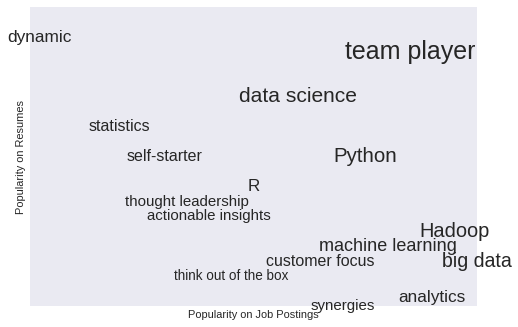

In [4]:
def text_size(total):
  """equals 8 if total is 0, 28 if total is 200"""
  return 8 + total / 200 * 20
for word, job_popularity, resume_popularity in data:
  plt.text(job_popularity, resume_popularity, word,
    ha='center', va='center',
    size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
def fix_unicode(text):
  return text.replace(u"\u2019", "'")

In [0]:
from bs4 import BeautifulSoup

import requests

url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

content = soup.find("div", "article-body")         # find article-body div
regex = r"[\w']+|[\.]"                             # matches a word or a period

document = []


for paragraph in content("p"):
  words = re.findall(regex, fix_unicode(paragraph.text))
  document.extend(words)

In [0]:
bigrams = zip(document, document[1:])
transitions = defaultdict(list)
for prev, current in bigrams:
  transitions[prev].append(current)

In [0]:
def generate_using_bigrams():
  current = "." # this means the next word will start a sentence
  result = []

  while True:
    next_word_candidates = transitions[current] # bigrams (current, _)
    current = random.choice(next_word_candidates) # choose one at random
    result.append(current) # append it to results
    if current == ".": return " ".join(result) # if "." we're done

In [19]:
generate_using_bigrams()

'It started looking at LinkedIn use of the URLs that members attended .'

In [0]:
trigrams = zip(document, document[1:], document[2:])
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in trigrams:
  if prev == ".": # if the previous "word" was a period
    starts.append(current) # then this is a start word
  trigram_transitions[(prev, current)].append(next)

In [0]:
def generate_using_trigrams():
  current = random.choice(starts) # choose a random starting word
  prev = "." # and precede it with a '.'
  result = [current]
  while True:
    next_word_candidates = trigram_transitions[(prev, current)]
    next_word = random.choice(next_word_candidates)
    prev, current = current, next_word
    result.append(current)
    if current == ".":
      return " ".join(result)

In [23]:
generate_using_trigrams()

"We've all heard a lot of data and you have no alternative but to work with very broadly defined problems here's a lot about big data but all the data changes ."

In [0]:
grammar = {
"_S" : ["_NP _VP"],
"_NP" : ["_N",
"_A _NP _P _A _N"],
"_VP" : ["_V",
"_V _NP"],
"_N" : ["data science", "Python", "regression"],
"_A" : ["big", "linear", "logistic"],
"_P" : ["about", "near"],
"_V" : ["learns", "trains", "tests", "is"]
}

In [0]:
def is_terminal(token):
  return token[0] != "_"

In [0]:
def expand(grammar, tokens):
  for i, token in enumerate(tokens):
    # skip over terminals
    if is_terminal(token): continue
    # if we get here, we found a non-terminal token
    # so we need to choose a replacement at random
    replacement = random.choice(grammar[token])
    if is_terminal(replacement):
      tokens[i] = replacement
    else:
      tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
    # now call expand on the new list of tokens
    return expand(grammar, tokens)
  # if we get here we had all terminals and are done
  return tokens

In [0]:
def generate_sentence(grammar):
  return expand(grammar, ["_S"])

In [29]:
generate_sentence(grammar)

['data science', 'learns']

In [0]:
def roll_a_die():
  return random.choice([1,2,3,4,5,6])
def direct_sample():
  d1 = roll_a_die()
  d2 = roll_a_die()
  return d1, d1 + d2
def random_y_given_x(x):
  """equally likely to be x + 1, x + 2, ... , x + 6"""
  return x + roll_a_die()

In [0]:
def random_x_given_y(y):
  if y <= 7:
    # if the total is 7 or less, the first die is equally likely to be
    # 1, 2, ..., (total - 1)
    return random.randrange(1, y)
  else:
    # if the total is 7 or more, the first die is equally likely to be
    # (total - 6), (total - 5), ..., 6
    return random.randrange(y - 6, 7)

In [0]:
def gibbs_sample(num_iters=100):
  x, y = 1, 2 # doesn't really matter
  for _ in range(num_iters):
    x = random_x_given_y(y)
    y = random_y_given_x(x)
  return x, y

In [0]:
def compare_distributions(num_samples=1000):
  counts = defaultdict(lambda: [0, 0])
  for _ in range(num_samples):
    counts[gibbs_sample()][0] += 1
    counts[direct_sample()][1] += 1
  return counts

In [0]:
def sample_from(weights):
  """returns i with probability weights[i] / sum(weights)"""
  total = sum(weights)
  rnd = total * random.random() # uniform between 0 and total
  for i, w in enumerate(weights):
    rnd -= w # return the smallest i such that
    if rnd <= 0: return i # weights[0] + ... + weights[i] >= rnd

In [0]:
documents = [
["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
["R", "Python", "statistics", "regression", "probability"],
["machine learning", "regression", "decision trees", "libsvm"],
["Python", "R", "Java", "C++", "Haskell", "programming languages"],
["statistics", "probability", "mathematics", "theory"],
["machine learning", "scikit-learn", "Mahout", "neural networks"],
["neural networks", "deep learning", "Big Data", "artificial intelligence"],
["Hadoop", "Java", "MapReduce", "Big Data"],
["statistics", "R", "statsmodels"],
["C++", "deep learning", "artificial intelligence", "probability"],
["pandas", "R", "Python"],
["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
["libsvm", "regression", "support vector machines"]
]

In [0]:
# a list of Counters, one for each document
document_topic_counts = [Counter() for _ in documents]

# a list of Counters, one for each topic
topic_word_counts = [Counter() for _ in range(4)]

# a list of numbers, one for each topic
topic_counts = [0 for _ in range(4)]

# a list of numbers, one for each document
document_lengths = map(len, documents)

distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

D = len(documents)

In [44]:
document_topic_counts[3][1]

0

In [45]:
topic_word_counts[2]["nlp"]

0

In [0]:
def p_topic_given_document(topic, d, alpha=0.1):
  """the fraction of words in document _d_
  that are assigned to _topic_ (plus some smoothing)"""
  return ((document_topic_counts[d][topic] + alpha) /
    (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
  """the fraction of words assigned to _topic_
  that equal _word_ (plus some smoothing)"""
  return ((topic_word_counts[topic][word] + beta) /
    (topic_counts[topic] + W * beta))

def topic_weight(d, word, k):
  """given a document and a word in that document,
  return the weight for the kth topic"""
  return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
  return sample_from([topic_weight(d, word, k)
    for k in range(K)])

In [0]:
random.seed(0)
document_topics = [[random.randrange(4) for word in document]
  for document in documents]

for d in range(D):
  for word, topic in zip(documents[d], document_topics[d]):
    document_topic_counts[d][topic] += 1
    topic_word_counts[topic][word] += 1
    topic_counts[topic] += 1

In [54]:
for iter in range(1000):
  for d in range(D):
    for i, (word, topic) in enumerate(zip(documents[d],document_topics[d])):
      # remove this word / topic from the counts
      # so that it doesn't influence the weights
      document_topic_counts[d][topic] -= 1
      topic_word_counts[topic][word] -= 1
      topic_counts[topic] -= 1
      document_lengths[d] -= 1
      # choose a new topic based on the weights
      new_topic = choose_new_topic(d, word)
      document_topics[d][i] = new_topic
      # and now add it back to the counts
      document_topic_counts[d][new_topic] += 1
      topic_word_counts[new_topic][word] += 1
      topic_counts[new_topic] += 1
      document_lengths[d] += 1

TypeError: ignored

In [52]:
for k, word_counts in enumerate(topic_word_counts):
  for word, count in word_counts.most_common():
    if count > 0: print (k, word, count)

0 scikit-learn 2
0 pandas 2
0 HBase 1
0 R 1
0 regression 1
0 Java 1
0 C++ 1
0 Haskell 1
0 statistics 1
0 artificial intelligence 1
0 Hadoop 1
0 Big Data 1
0 statsmodels 1
0 libsvm 1
1 neural networks 2
1 deep learning 2
1 Cassandra 1
1 HBase 1
1 Python 1
1 numpy 1
1 decision trees 1
1 theory 1
1 Mahout 1
1 databases 1
1 Postgres 1
1 MySQL 1
1 MongoDB 1
2 Java 2
2 Python 2
2 regression 2
2 R 2
2 Cassandra 1
2 MongoDB 1
2 Postgres 1
2 scipy 1
2 statsmodels 1
2 probability 1
2 mathematics 1
2 machine learning 1
2 statistics 1
2 C++ 1
2 artificial intelligence 1
2 HBase 1
3 Big Data 2
3 probability 2
3 Spark 1
3 Storm 1
3 NoSQL 1
3 statistics 1
3 machine learning 1
3 libsvm 1
3 Python 1
3 programming languages 1
3 MapReduce 1
3 R 1
3 support vector machines 1


In [0]:
topic_names = ["Big Data and programming languages",
"Python and statistics",
"databases",
"machine learning"]

In [60]:
for document, topic_counts in zip(documents, document_topic_counts):
  print (document)
  for topic, count in topic_counts.most_common():
    if count > 0:
      print (topic_names[topic], count,print)

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
databases 2 <built-in function print>
machine learning 1 <built-in function print>
Big Data and programming languages 1 <built-in function print>
['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 2 <built-in function print>
Python and statistics 2 <built-in function print>
machine learning 1 <built-in function print>
['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 2 <built-in function print>
Big Data and programming languages 2 <built-in function print>
databases 2 <built-in function print>
['R', 'Python', 'statistics', 'regression', 'probability']
Big Data and programming languages 2 <built-in function print>
databases 2 <built-in function print>
machine learning 1 <built-in function print>
['machine learning', 'regression', 'decision trees', 'libsvm']
machine learning 2 <built-in function print>
databases 1 <built-in function print>
Python and statistics 1

In [66]:
>>> import nltk
>>> nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [67]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [70]:
text1.concordance("monstrous")

text1.similar("monstrous")
  
text2.similar("monstrous")  

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u
true contemptible christian abundant few part mean careful puzzled
mystifying passing curio

In [71]:
 text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


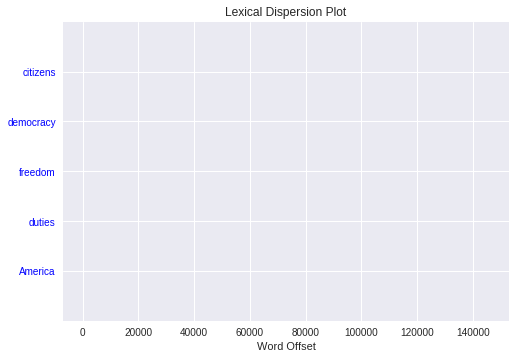

In [74]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [78]:
len(text3)

44764